In [114]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
from sklearn import datasets
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics

#visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid')

from IPython.display import Image
from sklearn.tree import export_graphviz

# Import packages
import pandas as pd
import numpy as np
from scipy import stats
import math
from sklearn import datasets

#Seaborn makes creating attractive graphs simpler
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)},font_scale=1,style='whitegrid')

#Matplotlib allows for completely custom graphing
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge, Lasso

from scipy import interp
from itertools import cycle
import numpy as np
from numpy.linalg import norm

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import datasets
from sklearn import svm

In [3]:
csv_fpath = os.path.expanduser('~/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv')
CarData = pd.read_csv(csv_fpath)
print(CarData.dtypes)
print(CarData.shape)

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [4]:
CarData.head(50)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,Unspecified,NaN,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Unspecified,NaN,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,Unspecified,NaN,NaN,NaN,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,Unspecified,NaN,NaN,NaN,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4289056,Sedan,Sedan,NaN,NaN,NaN
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,Unspecified,NaN,NaN,NaN,4281172,Sedan,4 dr sedan,NaN,NaN,NaN


In [5]:
CarData["BOROUGH"].value_counts()

BROOKLYN         361640
QUEENS           310684
MANHATTAN        276292
BRONX            163233
STATEN ISLAND     49531
Name: BOROUGH, dtype: int64

In [6]:
CarData["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

Unspecified                       606214
Driver Inattention/Distraction    315718
Failure to Yield Right-of-Way      95974
Following Too Closely              85142
Backing Unsafely                   64128
                                   ...  
Shoulders Defective/Improper          72
Windshield Inadequate                 69
Texting                               37
Listening/Using Headphones            18
1                                     10
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

In [7]:
CarData["VEHICLE TYPE CODE 1"].value_counts()

PASSENGER VEHICLE                      715236
SPORT UTILITY / STATION WAGON          313500
Sedan                                  184252
Station Wagon/Sport Utility Vehicle    151311
TAXI                                    50670
                                        ...  
FUEL                                        1
crane                                       1
us po                                       1
MARK                                        1
DOT T                                       1
Name: VEHICLE TYPE CODE 1, Length: 727, dtype: int64

In [8]:
def borough_to_numeric(x):
    if x=='QUEENS':
        return 1
    if x=='BROOKLYN':
        return 2
    if x=='MANHATTAN':
        return 3
    if x=='BRONX':
        return 4
    if x=='STATEN ISLAND':
        return 5
    else:
        return 0
    
CarData['borough_num'] = CarData['BOROUGH'].apply(borough_to_numeric)
CarData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1


In [9]:
def time_to_day_night(x):
    L = x.split(":")
    H = int(L[0])
    M = int(L[1])
    return (H + (M/60))
    
CarData['time_num'] = CarData['CRASH TIME'].apply(time_to_day_night)
CarData.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,0,9.000000
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,0,5.733333
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000


In [10]:
def injured_to_binary(x):
        if x>= 1:
            return 1
        else:
            return 0
CarData['injuries'] = CarData['NUMBER OF PERSONS INJURED'].apply(injured_to_binary)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,4276854,Sedan,Sedan,NaN,NaN,NaN,0,9.000000,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,4279961,Taxi,NaN,NaN,NaN,NaN,0,5.733333,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,NaN,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,21.000000,1
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,NaN,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,1,8.500000,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,NaN,4289056,Sedan,Sedan,NaN,NaN,NaN,0,18.600000,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,10.666667,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,NaN,4281172,Sedan,4 dr sedan,NaN,NaN,NaN,2,20.683333,0


In [11]:
BronxInjuries = CarData.loc[CarData['borough_num'] == 4,'NUMBER OF PERSONS INJURED'].sum()
print(BronxInjuries)
QueensInjuries = CarData.loc[CarData['borough_num'] == 1,'NUMBER OF PERSONS INJURED'].sum()
print(QueensInjuries)
BrooklynInjuries = CarData.loc[CarData['borough_num'] == 2,'NUMBER OF PERSONS INJURED'].sum()
print(BrooklynInjuries)
ManhattanInjuries = CarData.loc[CarData['borough_num'] == 3,'NUMBER OF PERSONS INJURED'].sum()
print(ManhattanInjuries)
StatenInjuries = CarData.loc[CarData['borough_num'] == 5,'NUMBER OF PERSONS INJURED'].sum()
print(StatenInjuries)

46684.0
81723.0
104966.0
48339.0
12518.0


In [12]:
BronxPop = 1,432,132
QueensPop = 2,278,906
BrooklynPop = 2,582,830
ManhattanPop = 1,628,701
StatenPop = 476,179
NYCPop = 8,398,748

In [13]:
NYCData = {'Borough':  ['Bronx','Queens','Manhattan','Brooklyn','Staten Island'],
        'Population': [1432132, 2278906, 1628701, 2582830, 476179],
         'Injuries': [46684, 81723, 48339, 104966, 12518]
        }

citydata = pd.DataFrame (NYCData, columns = ['Borough','Population','Injuries'])
print(citydata)

         Borough  Population  Injuries
0          Bronx     1432132     46684
1         Queens     2278906     81723
2      Manhattan     1628701     48339
3       Brooklyn     2582830    104966
4  Staten Island      476179     12518


In [14]:
citydata['proportion of injuries per borough'] = citydata['Injuries']/citydata['Population']
print(citydata)

         Borough  Population  Injuries  proportion of injuries per borough
0          Bronx     1432132     46684                            0.032598
1         Queens     2278906     81723                            0.035861
2      Manhattan     1628701     48339                            0.029679
3       Brooklyn     2582830    104966                            0.040640
4  Staten Island      476179     12518                            0.026288


In [15]:
print(CarData.dtypes)
print(CarData.shape)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                          object
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [16]:
CarData["NUMBER OF PERSONS KILLED"].head(60)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    0.0
51    0.0
52    0.0
53    0.0
54    0.0
55    0.0
56    0.0
57    0.0
58    0.0
59    0.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [17]:
def injuries_to_integers(x):
    if x > 0:
        return int(x)
    else:
        return 0
    
CarData['injuries_int'] = CarData['NUMBER OF PERSONS INJURED'].apply(injuries_to_integers)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,4276854,Sedan,Sedan,NaN,NaN,NaN,0,9.000000,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,4289613,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333,0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,4279961,Taxi,NaN,NaN,NaN,NaN,0,5.733333,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,4290178,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,4276801,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,4285412,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,21.000000,1,3
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,4284387,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,1,8.500000,0,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,4289056,Sedan,Sedan,NaN,NaN,NaN,0,18.600000,0,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,4287390,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,10.666667,0,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,4281172,Sedan,4 dr sedan,NaN,NaN,NaN,2,20.683333,0,0


In [18]:
def deaths_to_integers(x):
    if x > 0:
        return x
    else:
        return 0
    
CarData['killed_int'] = CarData['NUMBER OF PERSONS KILLED'].apply(deaths_to_integers)
CarData.head(100)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Sedan,Sedan,NaN,NaN,NaN,0,9.000000,0,0,0.0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333,0,0,0.0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Taxi,NaN,NaN,NaN,NaN,0,5.733333,0,0,0.0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0,0,0.0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,02/06/2020,17:35,MANHATTAN,10001,40.752150,-73.991295,POINT (-73.991295 40.75215),NaN,NaN,237 WEST 35 STREET,...,Sedan,Sedan,NaN,NaN,NaN,3,17.583333,0,0,0.0
96,02/08/2020,10:20,MANHATTAN,10065,40.761173,-73.957890,POINT (-73.95789 40.761173),YORK AVENUE,EAST 63 STREET,NaN,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,3,10.333333,0,0,0.0
97,01/23/2020,18:30,QUEENS,11368,40.754290,-73.856445,POINT (-73.856445 40.75429),NaN,NaN,111-23 37 AVENUE,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1,18.500000,0,0,0.0
98,01/18/2020,13:45,QUEENS,11372,40.752373,-73.879110,POINT (-73.87911 40.752373),35 AVENUE,88 STREET,NaN,...,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,1,13.750000,0,0,0.0


Data:

In [19]:
CarData.head(50)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Sedan,Sedan,NaN,NaN,NaN,0,9.000000,0,0,0.0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,AMBUL,AMBUL,NaN,NaN,NaN,1,19.333333,0,0,0.0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,Taxi,NaN,NaN,NaN,NaN,0,5.733333,0,0,0.0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0,0,0.0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Station Wagon/Sport Utility Vehicle,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0,0,0.0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,21.000000,1,3,0.0
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN,1,8.500000,0,0,0.0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,Sedan,Sedan,NaN,NaN,NaN,0,18.600000,0,0,0.0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN,0,10.666667,0,0,0.0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,Sedan,4 dr sedan,NaN,NaN,NaN,2,20.683333,0,0,0.0


In [20]:
citydata

,Borough,Population,Injuries,proportion of injuries per borough
0,Bronx,1432132,46684,0.032598
1,Queens,2278906,81723,0.035861
2,Manhattan,1628701,48339,0.029679
3,Brooklyn,2582830,104966,0.040640
4,Staten Island,476179,12518,0.026288


Visualizations

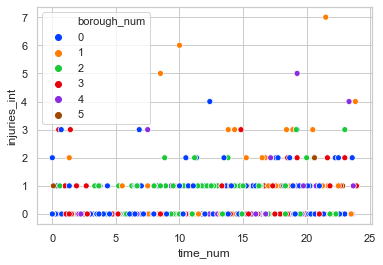

In [21]:
CarData_sample = CarData.sample(1000)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=6))
plt.show()

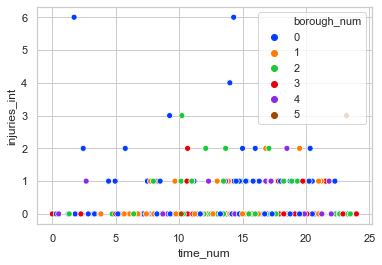

In [22]:
CarData_sample = CarData.sample(500)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=6))
plt.show()

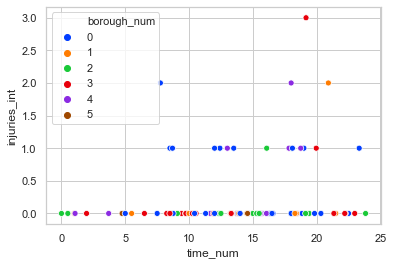

In [23]:
CarData_sample = CarData.sample(100)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=6))
plt.show()

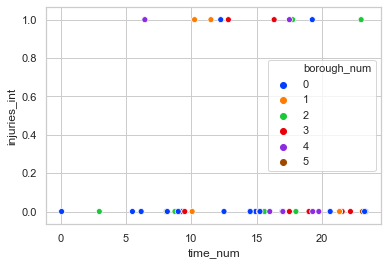

In [24]:
CarData_sample = CarData.sample(50)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=6))
plt.show()

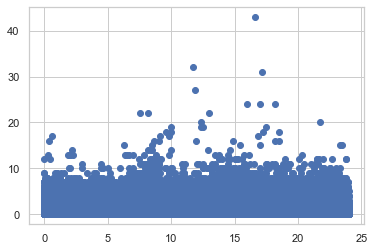

In [25]:
timevinjuries = plt.scatter(CarData['time_num'],CarData['injuries_int'])
plt.show()

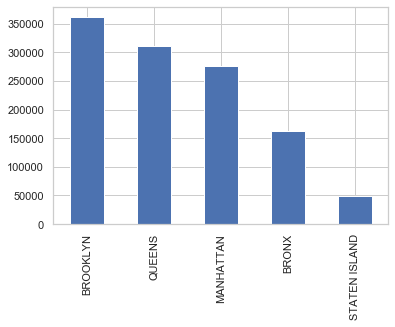

In [26]:
ax_1g = CarData['BOROUGH'].value_counts().plot(kind = 'bar')
plt.show()

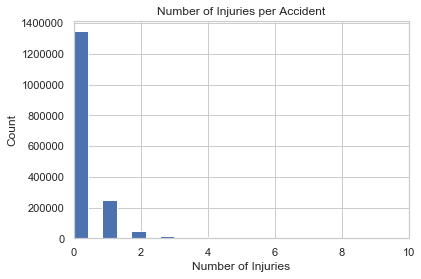

In [27]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(0,10)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

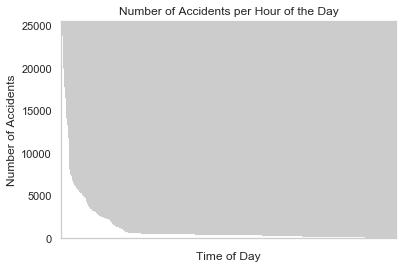

In [28]:
InjuryTimes = CarData['time_num'].value_counts().plot(kind = 'bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Hour of the Day')
InjuryTimes.axes.xaxis.set_ticklabels([])
plt.show()

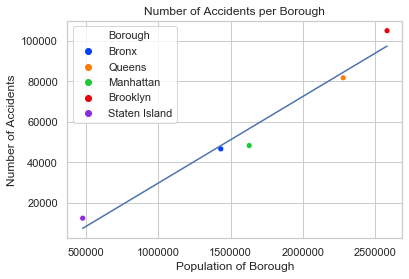

In [29]:
sns.scatterplot(x=citydata["Population"], y=citydata["Injuries"],
                    hue=citydata.loc[:,'Borough'], palette=sns.color_palette("bright",n_colors=5))
plt.xlabel('Population of Borough')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Borough')
x=citydata["Population"]
y=citydata["Injuries"]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [32]:
CarDataKnown = CarData[['LATITUDE','injuries_int','killed_int','time_int','time_num']].copy()
CarDataKnown.head(60)
#new = old[['A', 'C', 'D']].copy()

KeyError: "['time_int'] not in index"

In [30]:
CarData['time_int'] = CarData['time_num'].round()
CarData.head(7)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int,time_int
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,Sedan,NaN,NaN,NaN,0,9.000000,0,0,0.0,9.0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,AMBUL,NaN,NaN,NaN,1,19.333333,0,0,0.0,19.0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,NaN,NaN,0,5.733333,0,0,0.0,6.0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,Tractor Truck Diesel,NaN,NaN,NaN,2,9.000000,0,0,0.0,9.0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,Pick-up Truck,NaN,NaN,NaN,1,0.000000,0,0,0.0,0.0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2,21.000000,1,3,0.0,21.0
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,Taxi,NaN,NaN,NaN,1,8.500000,0,0,0.0,8.0


In [31]:
X_feat = CarData[['injuries_int','killed_int']]
y = CarData['time_int']
t = DecisionTreeClassifier(max_depth=2,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  

In [ ]:
x_min, x_max = CarData['injuries_int'].min()-1, CarData['injuries_int'].max()+1
y_min, y_max = CarData['killed_int'].min()-1, CarData['killed_int'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=CarData['injuries_int'],y=CarData['killed_int'],c=CarData['time_int'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('injuries_int')
plt.ylabel('killed_int')

In [ ]:
X_feat = CarData[['injuries_int','killed_int']]
y = CarData['LATITUDE']
t = DecisionTreeClassifier(max_depth=5,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  

In [ ]:
x_min, x_max = CarData['injuries_int'].min()-1, CarData['injuries_int'].max()+1
y_min, y_max = CarData['killed_int'].min()-1, CarData['killed_int'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=CarData['injuries_int'],y=CarData['killed_int'],c=CarData['LATITUDE'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('injuries_int')
plt.ylabel('killed_int')

In [32]:
feature_col = "borough_num"
resp_col = "injuries_int"

X = CarData[feature_col].copy()
y = CarData[resp_col].copy()


X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.28409104]
[('b', array([-0.01223973]))]
R^2:  0.0007247393839661109
MSE:  0.43556914063683205


In [33]:
feature_col = "injuries_int"
resp_col = "killed_int"

X = CarData[feature_col].copy()
y = CarData[resp_col].copy()


X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.0009232]
[('i', array([0.00095213]))]
R^2:  0.0003009278729581011
MSE:  0.0013127092202980866


In [34]:
def killed_to_binary(x):
    if x >= 1:
        return 1
    else:
        return 0
CarData['killed_bin'] = CarData['NUMBER OF PERSONS KILLED'].apply(killed_to_binary)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int,time_int,killed_bin
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,NaN,0,9.000000,0,0,0.0,9.0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,NaN,1,19.333333,0,0,0.0,19.0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,NaN,0,5.733333,0,0,0.0,6.0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,NaN,2,9.000000,0,0,0.0,9.0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,NaN,1,0.000000,0,0,0.0,0.0,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,NaN,NaN,NaN,2,21.000000,1,3,0.0,21.0,0
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,NaN,NaN,NaN,1,8.500000,0,0,0.0,8.0,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,NaN,NaN,NaN,0,18.600000,0,0,0.0,19.0,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,NaN,NaN,0,10.666667,0,0,0.0,11.0,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,NaN,NaN,NaN,2,20.683333,0,0,0.0,21.0,0


In [35]:
def inj_to_binary(x):
    if x >= 1:
        return 1
    else:
        return 0
CarData['inj_bin'] = CarData['NUMBER OF PERSONS INJURED'].apply(inj_to_binary)
CarData.head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,borough_num,time_num,injuries,injuries_int,killed_int,time_int,killed_bin,inj_bin
0,01/21/2020,9:00,NaN,NaN,40.715820,-73.817590,POINT (-73.81759 40.71582),GRAND CENTRAL PKWY,NaN,NaN,...,NaN,NaN,0,9.000000,0,0,0.0,9.0,0,0
1,02/16/2020,19:20,QUEENS,11373,40.744590,-73.884674,POINT (-73.884674 40.74459),BAXTER AVENUE,LAYTON STREET,NaN,...,NaN,NaN,1,19.333333,0,0,0.0,19.0,0,0
2,01/28/2020,5:44,NaN,NaN,40.755950,-73.990740,POINT (-73.99074 40.75595),WEST 40 STREET,NaN,NaN,...,NaN,NaN,0,5.733333,0,0,0.0,6.0,0,0
3,02/18/2020,9:00,BROOKLYN,11206,40.703762,-73.935620,POINT (-73.93562 40.703762),NaN,NaN,210 VARET STREET,...,NaN,NaN,2,9.000000,0,0,0.0,9.0,0,0
4,01/21/2020,0:00,QUEENS,11378,40.716946,-73.911194,POINT (-73.911194 40.716946),FLUSHING AVENUE,57 STREET,NaN,...,NaN,NaN,1,0.000000,0,0,0.0,0.0,0,0
5,01/27/2020,21:00,BROOKLYN,11236,40.636536,-73.914410,POINT (-73.91441 40.636536),NaN,NaN,749 EAST 80 STREET,...,NaN,NaN,2,21.000000,1,3,0.0,21.0,0,1
6,02/06/2020,8:30,QUEENS,11102,40.774540,-73.919650,POINT (-73.91965 40.77454),NaN,NaN,24-20 CRESCENT STREET,...,NaN,NaN,1,8.500000,0,0,0.0,8.0,0,0
7,02/10/2020,18:36,NaN,NaN,NaN,NaN,NaN,PELHAM PARKWAY SOUTH,STILLWELL AVENUE,NaN,...,NaN,NaN,0,18.600000,0,0,0.0,19.0,0,0
8,02/12/2020,10:40,NaN,NaN,40.840180,-73.926470,POINT (-73.92647 40.84018),WEST 169 STREET,NaN,NaN,...,NaN,NaN,0,10.666667,0,0,0.0,11.0,0,0
9,01/27/2020,20:41,BROOKLYN,11217,40.688457,-73.982720,POINT (-73.98272 40.688457),LIVINGSTON STREET,HANOVER PLACE,NaN,...,NaN,NaN,2,20.683333,0,0,0.0,21.0,0,0


In [36]:
X = CarData["borough_num"].dropna()
Y = CarData["killed_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.9988704778710633


In [37]:
X = CarData["borough_num"].dropna()
Y = CarData["inj_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.8064345050753673


<font size="18">**KNOWN DATA**

In [38]:
CarDataKnown = CarData[["BOROUGH",'borough_num','LATITUDE','LONGITUDE','injuries_int','killed_int','time_int','time_num','inj_bin','killed_bin']].dropna().copy()
CarDataKnown.head(10)

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0
3,BROOKLYN,2,40.703762,-73.935620,0,0.0,9.0,9.000000,0,0
4,QUEENS,1,40.716946,-73.911194,0,0.0,0.0,0.000000,0,0
5,BROOKLYN,2,40.636536,-73.914410,3,0.0,21.0,21.000000,1,0
6,QUEENS,1,40.774540,-73.919650,0,0.0,8.0,8.500000,0,0
9,BROOKLYN,2,40.688457,-73.982720,0,0.0,21.0,20.683333,0,0
13,BRONX,4,40.892475,-73.854500,1,0.0,11.0,11.416667,1,0
14,BRONX,4,40.852337,-73.863930,0,0.0,14.0,14.000000,0,0
15,MANHATTAN,3,40.760600,-73.964340,0,0.0,17.0,16.600000,0,0
16,MANHATTAN,3,40.719970,-73.992905,0,0.0,12.0,11.750000,0,0


In [39]:
CarDataKnown["number_affected"] = CarDataKnown['injuries_int']+CarDataKnown["killed_int"]
print(CarDataKnown)

           BOROUGH  borough_num   LATITUDE  LONGITUDE  injuries_int  \
1           QUEENS            1  40.744590 -73.884674             0   
3         BROOKLYN            2  40.703762 -73.935620             0   
4           QUEENS            1  40.716946 -73.911194             0   
5         BROOKLYN            2  40.636536 -73.914410             3   
6           QUEENS            1  40.774540 -73.919650             0   
...            ...          ...        ...        ...           ...   
1670612  MANHATTAN            3  40.785171 -73.973134             0   
1670613  MANHATTAN            3  40.772344 -73.952686             2   
1670614  MANHATTAN            3  40.768802 -73.958360             0   
1670615  MANHATTAN            3  40.754348 -73.976972             1   
1670617      BRONX            4  40.902044 -73.851552             0   

         killed_int  time_int   time_num  inj_bin  killed_bin  number_affected  
1               0.0      19.0  19.333333        0           0     

In [40]:
print(CarDataKnown.dtypes)
print(CarDataKnown.shape)
print(CarDataKnown['injuries_int'].shape)
print(CarDataKnown['time_num'].shape)
print(CarDataKnown['inj_bin'].shape)

BOROUGH             object
borough_num          int64
LATITUDE           float64
LONGITUDE          float64
injuries_int         int64
killed_int         float64
time_int           float64
time_num           float64
inj_bin              int64
killed_bin           int64
number_affected    float64
dtype: object
(1131475, 11)
(1131475,)
(1131475,)
(1131475,)


In [41]:
CarDataKnown['BOROUGH'].value_counts()

BROOKLYN         353510
QUEENS           303960
MANHATTAN        267733
BRONX            158025
STATEN ISLAND     48247
Name: BOROUGH, dtype: int64

In [42]:
CarDataKnown.sort_values(by='injuries_int',ascending=True,inplace=True)
CarDataKnown.head()

,BOROUGH,borough_num,LATITUDE,LONGITUDE,injuries_int,killed_int,time_int,time_num,inj_bin,killed_bin,number_affected
1,QUEENS,1,40.744590,-73.884674,0,0.0,19.0,19.333333,0,0,0.0
1123741,BROOKLYN,2,40.692156,-73.985280,0,0.0,13.0,12.916667,0,0,0.0
1123742,QUEENS,1,40.720966,-73.842893,0,0.0,13.0,12.583333,0,0,0.0
1123743,QUEENS,1,40.741028,-73.934308,0,0.0,15.0,15.416667,0,0,0.0
1123744,BRONX,4,40.834057,-73.889727,0,0.0,4.0,4.000000,0,0,0.0


In [43]:
BronxInjuries = CarDataKnown.loc[CarData['borough_num'] == 4,'injuries_int'].sum()
print(BronxInjuries)
QueensInjuries = CarDataKnown.loc[CarData['borough_num'] == 1,'injuries_int'].sum()
print(QueensInjuries)
BrooklynInjuries = CarDataKnown.loc[CarData['borough_num'] == 2,'injuries_int'].sum()
print(BrooklynInjuries)
ManhattanInjuries = CarDataKnown.loc[CarData['borough_num'] == 3,'injuries_int'].sum()
print(ManhattanInjuries)
StatenInjuries = CarDataKnown.loc[CarData['borough_num'] == 5,'injuries_int'].sum()
print(StatenInjuries)

45165
79813
102527
46879
12223


In [44]:
NYCDataKnown = {'Borough':  ['Bronx','Queens','Manhattan','Brooklyn','Staten Island'],
        'Population': [1432132, 2278906, 1628701, 2582830, 476179],
         'Injuries': [45165, 79813, 46879, 102527, 12223]
        }

citydataknown = pd.DataFrame (NYCDataKnown, columns = ['Borough','Population','Injuries'])
print(citydataknown)

         Borough  Population  Injuries
0          Bronx     1432132     45165
1         Queens     2278906     79813
2      Manhattan     1628701     46879
3       Brooklyn     2582830    102527
4  Staten Island      476179     12223


In [45]:
CarDataKnown['BOROUGH'].value_counts()

BROOKLYN         353510
QUEENS           303960
MANHATTAN        267733
BRONX            158025
STATEN ISLAND     48247
Name: BOROUGH, dtype: int64

In [46]:
citydataknown["proportion inj to pop"] = citydataknown['Injuries']/citydataknown["Population"]
print(citydataknown)

         Borough  Population  Injuries  proportion inj to pop
0          Bronx     1432132     45165               0.031537
1         Queens     2278906     79813               0.035023
2      Manhattan     1628701     46879               0.028783
3       Brooklyn     2582830    102527               0.039696
4  Staten Island      476179     12223               0.025669


In [47]:

citydataknown["proportion inj to pop"] = citydataknown['Injuries']/citydataknown["Population"]
print(citydataknown)

         Borough  Population  Injuries  proportion inj to pop
0          Bronx     1432132     45165               0.031537
1         Queens     2278906     79813               0.035023
2      Manhattan     1628701     46879               0.028783
3       Brooklyn     2582830    102527               0.039696
4  Staten Island      476179     12223               0.025669


In [48]:
X_feat = CarDataKnown[['injuries_int','killed_int']]
y = CarDataKnown['time_int']
t = DecisionTreeClassifier(max_depth=2,criterion='entropy')
t.fit(X_feat,y)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=X_feat.columns.tolist(),  
                    filled=True, rounded=True,  
                    special_characters=True)  

Text(0, 0.5, 'killed_int')

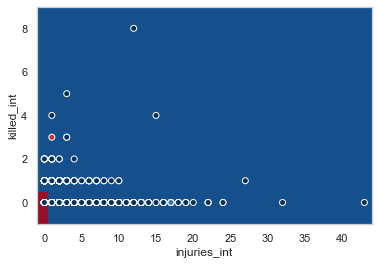

In [75]:
x_min, x_max = CarDataKnown['injuries_int'].min()-1, CarDataKnown['injuries_int'].max()+1
y_min, y_max = CarDataKnown['killed_int'].min()-1, CarDataKnown['killed_int'].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .01),np.arange(y_min, y_max, .01))
Z = t.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='RdBu')
plt.scatter(x=CarDataKnown['injuries_int'],y=CarDataKnown['killed_int'],c=CarDataKnown['time_int'],cmap='RdBu',vmin=-.2, vmax=1.2,edgecolors='white')
plt.xlabel('injuries_int')
plt.ylabel('killed_int')

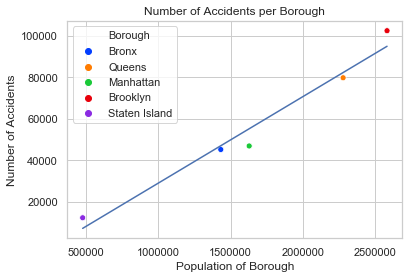

In [49]:
sns.scatterplot(x=citydataknown["Population"], y=citydataknown["Injuries"],
                    hue=citydataknown.loc[:,'Borough'], palette=sns.color_palette("bright",n_colors=5))
plt.xlabel('Population of Borough')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Borough')
x=citydataknown["Population"]
y=citydataknown["Injuries"]
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

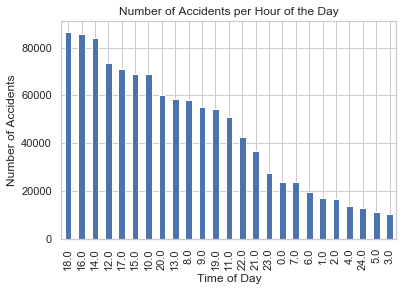

In [50]:
InjuryTimes = CarDataKnown['time_int'].value_counts().plot(kind = 'bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents per Hour of the Day')
plt.show()

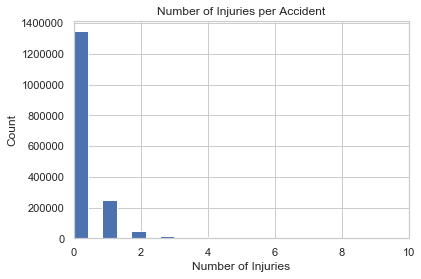

In [51]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(0,10)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

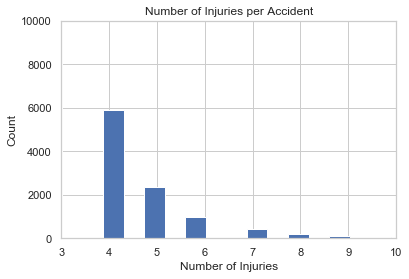

In [52]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(3,10)
plt.ylim(0,10000)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

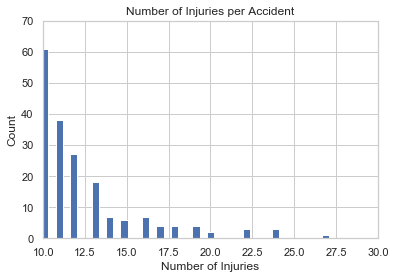

In [53]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(10,30)
plt.ylim(0,70)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

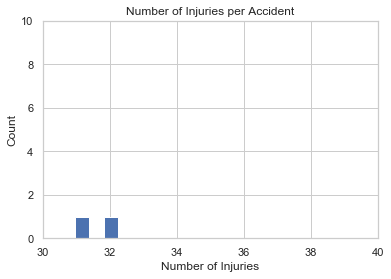

In [54]:
InjuriesDistribution = plt.hist(CarData['injuries_int'], bins=100) 
plt.xlim(30,40)
plt.ylim(0,10)
plt.xlabel('Number of Injuries')
plt.ylabel('Count')
plt.title('Number of Injuries per Accident')
plt.show()

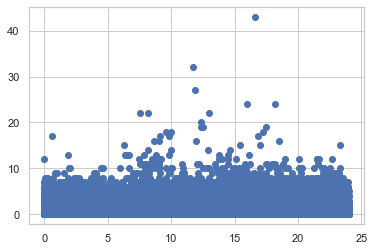

In [55]:
timevinjuries = plt.scatter(CarDataKnown['time_num'],CarDataKnown['injuries_int'])
plt.show()

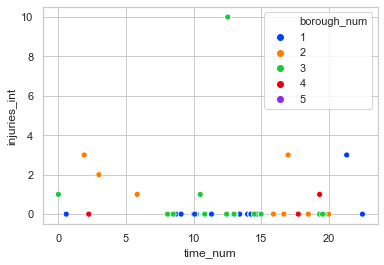

In [56]:
CarData_sample = CarDataKnown.sample(50)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=5))
plt.show()

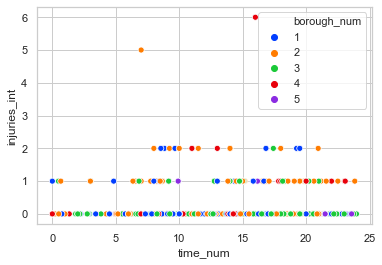

In [57]:
CarData_sample = CarDataKnown.sample(500)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=5))
plt.show()

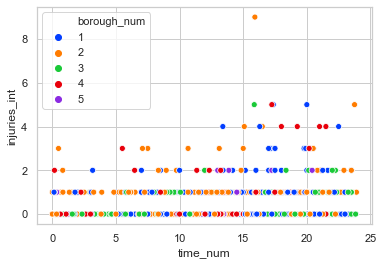

In [58]:
CarData_sample = CarDataKnown.sample(2000)
timevinjuries = sns.scatterplot(x=CarData_sample['time_num'], y=CarData_sample['injuries_int'],
                    hue=CarData_sample.loc[:,'borough_num'], palette=sns.color_palette("bright",n_colors=5))
plt.show()

Text(0.5, 1.0, 'Histogram of Injuries grouped by Borough')

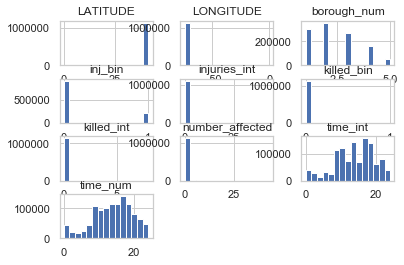

In [59]:
car_group = CarDataKnown['injuries_int'].groupby(CarDataKnown['borough_num'])
stackedHistogram = CarDataKnown.hist(bins=15)
sns.mpl.pyplot.xlabel("Count")
sns.mpl.pyplot.ylabel("Injury Numbers")
sns.mpl.pyplot.legend(stackedHistogram)
sns.mpl.pyplot.title("Histogram of Injuries grouped by Borough")

In [60]:
feature_col = "borough_num"
resp_col = "injuries_int"

X = CarData[feature_col].copy()
y = CarData[resp_col].copy()


X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.28409104]
[('b', array([-0.01223973]))]
R^2:  0.0007247393839661109
MSE:  0.43556914063683205


In [61]:
feature_col = "borough_num"
resp_col = "injuries_int"

X = CarDataKnown[feature_col].copy()
y = CarDataKnown[resp_col].copy()

X=X[X>0]
Y=Y[Y>0]
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.27495457]
[('b', array([-0.0091152]))]
R^2:  0.00026829997887711787
MSE:  0.40460591326002415


In [62]:
feature_col = "LATITUDE"
resp_col = "injuries_int"

X = CarDataKnown[feature_col].copy()
y = CarDataKnown[resp_col].copy()

X=X[X>=0]
Y=Y[Y>=0]
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.28198672]
[('L', array([-0.00070491]))]
R^2:  1.6203283246252198e-06
MSE:  0.4047138423809647


In [63]:
feature_col = "time_num"
resp_col = "borough_num"

X = CarDataKnown[feature_col].copy()
y = CarDataKnown[resp_col].copy()

X=X[X>=0]
Y=Y[Y>=0]
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[2.37788274]
[('t', array([-0.00019279]))]
R^2:  8.796442386715952e-07
MSE:  1.3068828838387236


In [64]:
feature_col = "time_num"
resp_col = "LATITUDE"

X = CarDataKnown[feature_col].copy()
y = CarDataKnown[resp_col].copy()

X=X[X>=0]
Y=Y[Y>=0]
X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[40.66381201]
[('t', array([0.00192669]))]
R^2:  8.699908498321918e-05
MSE:  1.3196280954937887


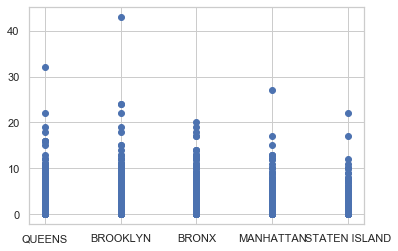

In [65]:
boroughvinjuries = plt.scatter(CarDataKnown['BOROUGH'],CarDataKnown['injuries_int'])
plt.show()

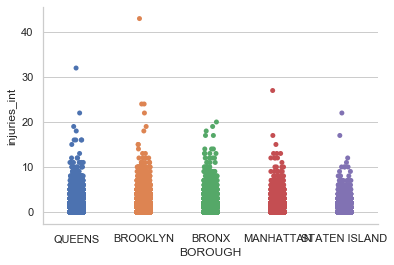

In [66]:
boroughjitter = sns.stripplot(x=CarDataKnown['BOROUGH'], y=CarDataKnown['injuries_int'], data=CarDataKnown, jitter=True)
sns.despine()

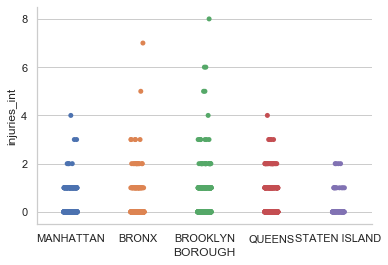

In [67]:
CarData_samplej = CarDataKnown.sample(2000)
boroughjitter = sns.stripplot(x=CarData_samplej['BOROUGH'], y=CarData_samplej['injuries_int'], data=CarDataKnown, jitter=True)
sns.despine()

**R squared problem:**

In [68]:
feature_col = "injuries_int"
resp_col = "killed_int"

X = CarDataKnown[feature_col].copy()
y = CarDataKnown[resp_col].copy()


X = X.dropna()
y = y.dropna()
pred = np.array(X)
resp = np.array(y)
pred = X.values.reshape(-1,1)
resp = y.values.reshape(-1,1)

linreg = LinearRegression()
linreg.fit(pred,resp)

resp_pred = linreg.predict(pred)

print(linreg.intercept_)
print(list(zip(feature_col,linreg.coef_)))

print("R^2: ", metrics.r2_score(resp, resp_pred))
print("MSE: ", metrics.mean_squared_error(resp, resp_pred))

[0.00082928]
[('i', array([0.00096193]))]
R^2:  0.0003104847122146204
MSE:  0.001205748017657241


In [69]:
X = CarDataKnown["borough_num"].dropna()
Y = CarDataKnown["killed_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.9989624163149871


In [70]:
X = CarDataKnown["borough_num"].dropna()
Y = CarDataKnown["inj_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.8094328199916039


/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


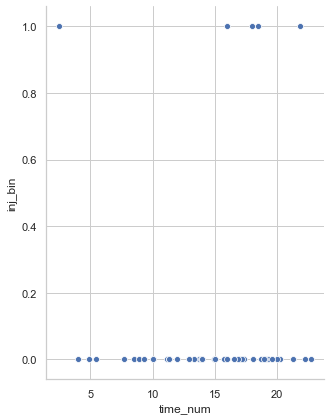

In [71]:
CarData_sampleLOG = CarDataKnown.sample(50)
graphlog = sns.pairplot(CarData_sampleLOG,x_vars="time_num",y_vars="inj_bin", size=6, aspect=0.8)
plt.show()

In [72]:
X = CarDataKnown["time_num"].dropna()
Y = CarDataKnown["inj_bin"].dropna()
pred = np.array(X)
resp = np.array(Y)
pred = X.values.reshape(-1,1)
resp = Y.values.reshape(-1,1)

X = pred
Y = resp

logreg_all = LogisticRegression(C=1e9)
logreg_all.fit(X,Y)
print("Accuracy without splitting data:",metrics.accuracy_score(Y,logreg_all.predict(X)))

/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/SofiaS/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy without splitting data: 0.8094328199916039


haha more models sorry!!!!!!

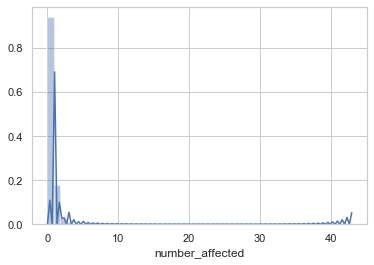

In [73]:
sns.distplot(CarDataKnown['number_affected']);

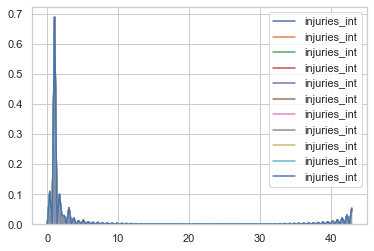

In [74]:
for col in 'borough_num':
    sns.kdeplot(CarDataKnown["injuries_int"], shade=True)

**MLP Models**

In [106]:
Xs_r, y_r = datasets.make_regression(n_features=9,n_samples=1000,noise=0.6)
features_r = pd.DataFrame(Xs_r)
data_r = pd.concat([features_r,pd.DataFrame(y_r)],axis=1)
data_r.columns = ['borough_num','LATITUDE','LONGITUDE','injuries_int','killed_int','time_int','time_num','inj_bin','killed_bin','number_affected']
X_train, X_test, y_train, y_test = train_test_split(features_r, y_r, test_size=0.25)

In [107]:
mlp = MLPRegressor(hidden_layer_sizes = (100,100,100), 
                   activation='identity', 
                   solver = 'adam', 
                   verbose=True, 
                   random_state=0, 
                   max_iter=1500)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test))

Iteration 1, loss = 15648.31784717
Iteration 2, loss = 15394.33445006
Iteration 3, loss = 15037.01306915
Iteration 4, loss = 14580.65527871
Iteration 5, loss = 13931.52182264
Iteration 6, loss = 13039.97967508
Iteration 7, loss = 11818.29988457
Iteration 8, loss = 10319.76948724
Iteration 9, loss = 8471.94651216
Iteration 10, loss = 6304.12695446
Iteration 11, loss = 4152.06207398
Iteration 12, loss = 2291.59728049
Iteration 13, loss = 1100.23086689
Iteration 14, loss = 658.34439218
Iteration 15, loss = 551.07391189
Iteration 16, loss = 373.03461350
Iteration 17, loss = 142.29420190
Iteration 18, loss = 42.03645561
Iteration 19, loss = 47.34962814
Iteration 20, loss = 67.03214324
Iteration 21, loss = 55.77142968
Iteration 22, loss = 29.42386390
Iteration 23, loss = 14.83681829
Iteration 24, loss = 11.90142210
Iteration 25, loss = 10.07588961
Iteration 26, loss = 5.14675071
Iteration 27, loss = 1.38872174
Iteration 28, loss = 1.11708086
Iteration 29, loss = 1.82749048
Iteration 30, loss

In [108]:
mlp = MLPRegressor(hidden_layer_sizes = (100,100,100), 
                   activation='relu', 
                   solver = 'adam', 
                   verbose=True, 
                   random_state=0, 
                   max_iter=1500)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test))

Iteration 1, loss = 15775.04378211
Iteration 2, loss = 15731.85660594
Iteration 3, loss = 15674.88188306
Iteration 4, loss = 15603.75519943
Iteration 5, loss = 15501.03851398
Iteration 6, loss = 15358.82193991
Iteration 7, loss = 15157.44367713
Iteration 8, loss = 14893.28980148
Iteration 9, loss = 14536.46455870
Iteration 10, loss = 14058.82644059
Iteration 11, loss = 13452.36821209
Iteration 12, loss = 12691.15124150
Iteration 13, loss = 11750.22764108
Iteration 14, loss = 10650.06718468
Iteration 15, loss = 9333.91056910
Iteration 16, loss = 7852.28172083
Iteration 17, loss = 6235.29741824
Iteration 18, loss = 4674.45984133
Iteration 19, loss = 3125.09878085
Iteration 20, loss = 1878.89653224
Iteration 21, loss = 1020.33891345
Iteration 22, loss = 555.77279559
Iteration 23, loss = 429.66859157
Iteration 24, loss = 358.56524939
Iteration 25, loss = 241.08063132
Iteration 26, loss = 164.55149857
Iteration 27, loss = 154.94103187
Iteration 28, loss = 138.82301101
Iteration 29, loss = 1

Iteration 252, loss = 2.46674353
Iteration 253, loss = 2.33126535
Iteration 254, loss = 2.31373284
Iteration 255, loss = 2.35209647
Iteration 256, loss = 2.34734794
Iteration 257, loss = 2.35651668
Iteration 258, loss = 2.25849862
Iteration 259, loss = 2.25344636
Iteration 260, loss = 2.24798895
Iteration 261, loss = 2.26160728
Iteration 262, loss = 2.21176013
Iteration 263, loss = 2.21301035
Iteration 264, loss = 2.23775698
Iteration 265, loss = 2.20556984
Iteration 266, loss = 2.17700445
Iteration 267, loss = 2.18513693
Iteration 268, loss = 2.16793498
Iteration 269, loss = 2.21077586
Iteration 270, loss = 2.14802756
Iteration 271, loss = 2.13367358
Iteration 272, loss = 2.18194502
Iteration 273, loss = 2.08024119
Iteration 274, loss = 2.06167951
Iteration 275, loss = 2.05474770
Iteration 276, loss = 2.02098218
Iteration 277, loss = 2.01807241
Iteration 278, loss = 1.99264357
Iteration 279, loss = 1.98170782
Iteration 280, loss = 1.97167269
Iteration 281, loss = 1.97088434
Iteration 

In [109]:
mlp = MLPRegressor(hidden_layer_sizes = (100,100,100), 
                   activation='relu', 
                   solver = 'lbfgs', 
                   verbose=True, 
                   random_state=0, 
                   max_iter=500)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test))

0.9998876677330758


In [79]:
Xs,y = datasets.make_classification(n_features=10,n_samples=5000,n_classes=4,n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2)

In [110]:
mlp = MLPClassifier(hidden_layer_sizes = (300,300,300), 
                    activation='relu', 
                    solver = 'adam', 
                    verbose=True, 
                    random_state=0, 
                    max_iter=1500)
mlp.fit(X_train, y_train)
print(mlp.score(X_test,y_test))

ValueError: Unknown label type: (array([-8.69426967e+01, -1.33180913e+02, -2.97545336e+02, -7.77167889e+01,
        4.34955173e+01,  3.21844842e+01,  1.72623054e+02,  4.21248609e+02,
       -3.16094507e+02,  2.45047318e+02, -1.48209211e+01, -1.06056319e+02,
       -1.91906060e+02,  4.75087037e+02,  1.14283088e+02,  4.53897112e+01,
        5.83417180e+01,  2.67374529e+02, -3.06685567e+02,  1.27159801e+02,
        1.43271694e+01, -1.10981180e+02, -1.40744413e+02,  1.85776149e+02,
       -8.46210997e+01,  1.85161489e+02, -1.08324156e+02,  2.29823157e+02,
       -3.52243609e+02,  1.54786211e+02,  4.69490911e+01, -7.67725192e+01,
        2.31871724e+01,  1.93547148e+02,  7.85170406e+01, -2.40149772e+02,
        4.58699238e+02,  1.23265314e+02,  2.71926950e+02, -2.37909445e+01,
        1.84898366e+02, -1.15342949e+00, -1.26564438e+02,  6.48870254e+02,
        3.76698505e+02, -1.29244247e+02,  2.22981117e+02, -2.68903282e+01,
       -4.26134276e+01, -3.44150734e+02, -8.09305014e+01,  3.82335132e+02,
        2.33110848e+02,  2.60724199e+02,  1.46419723e+02,  6.80313895e+01,
        2.86681422e+02, -1.72771542e+02, -1.79832843e+02,  1.89915706e+02,
        1.05895132e+02,  6.74800866e+01, -3.53503980e+02,  1.26830389e+02,
       -9.42162039e+01,  8.72230280e+01, -4.68162588e+01,  1.84255646e+01,
        1.73773202e+02,  5.04465839e+01,  3.26479932e+01, -1.61412123e+02,
       -4.49388183e+02, -1.32725159e+02, -3.65241913e+02,  1.39082653e+02,
        2.21725530e+02, -1.58435139e+02,  7.37479396e+01,  1.12324252e+02,
        1.75881562e+01,  2.24344817e+02, -1.01163983e+02,  1.39309344e+02,
        4.35118198e+01, -1.95609975e+01, -1.73339038e+02,  2.39333381e+02,
        3.91402867e+01, -8.05038327e+01,  7.12065514e+01, -1.02894670e+02,
       -2.00581948e+00,  6.05299466e+01,  8.39500851e+00, -9.34651469e+01,
       -1.62284643e+02, -2.24798654e+02,  1.33896709e+01,  8.40970052e+01,
        6.54154013e+01,  5.01927129e+01,  7.16739410e+01, -1.45431718e+02,
       -2.32302751e+02,  1.53269672e+01, -2.29510760e+02,  2.16545607e+01,
       -6.82219807e+01, -2.35609510e+02, -2.20790766e+01, -2.82881331e+00,
        3.22883689e+01, -1.05773957e+02, -6.41532257e+01,  2.62761038e+01,
        5.99257217e+01,  6.28553060e+01,  1.91830877e+01,  1.15284795e+02,
        2.36255825e+02,  1.10728480e+02,  3.07534559e+02,  1.48074330e+02,
        7.28020891e+01,  1.62841756e+02,  2.21592572e+02, -4.05978542e+01,
       -2.39817599e+02, -1.64872887e+02, -2.17450521e+02,  5.13336777e+01,
        7.55033354e+01, -8.30257056e+01, -1.62422982e+02, -8.42581253e+00,
        8.98947817e-01,  1.39917723e+02,  1.59502721e+02, -8.89006210e+01,
       -2.85996311e+02,  1.49855390e+02,  2.66819203e+02,  7.80684800e+01,
        6.80040229e+01,  1.99287379e+02, -3.16221113e+02, -1.92375461e+02,
        2.11365141e+02,  9.94695707e+01, -2.16219321e+02, -1.59237937e+02,
        8.79048641e+01,  1.47658397e+02, -1.12478827e+02,  5.78817638e+01,
       -7.10505441e+01, -2.11754503e+02, -1.63284633e+01,  3.21174623e+02,
        9.64411538e+01,  4.10536280e+02,  1.15561844e+02, -1.42061548e+02,
       -2.26164099e+02,  3.07581819e+02, -1.23628685e+01, -2.90108271e+02,
        8.73942740e+01, -1.69499117e+02,  1.18675634e+02, -2.02200501e+02,
        1.77855902e+02, -2.18861316e+02, -1.26825228e+02, -1.13270077e+02,
       -4.43309949e+01,  3.39276549e+02,  4.65984061e+01,  1.36404069e+02,
        1.27476803e+02,  7.80336197e+01,  1.51374428e+02, -1.81364254e+01,
        4.40927672e+02, -4.91335143e+00, -1.15012620e+02, -2.76023952e+01,
        1.20408302e+02,  2.98240643e+02,  2.62816093e+02,  3.55232150e+01,
       -3.36633743e+02,  2.05470373e+02,  1.66909543e+02, -4.08904143e+01,
       -5.31807916e+01,  4.58367177e+01, -1.16971811e+01, -2.84877590e+01,
        6.08594887e+00,  2.38318585e+02, -3.06547065e+01,  1.56002952e+02,
       -1.23506120e+01,  1.15646648e+01, -2.98218615e+02,  2.44573971e+02,
        2.17460408e+02, -8.31084811e+01, -1.80858468e+02,  1.53660797e+02,
       -2.71032970e+02,  1.65638477e+00,  1.88204757e+02,  2.69114941e+01,
        7.67376518e+00, -2.33193869e+02,  1.54705249e+02,  9.19117037e+01,
       -1.22276717e+02, -1.00995094e+01,  1.29966527e+02,  2.91172861e+02,
       -1.44695770e+02, -1.95455597e+02, -5.04832615e+01,  9.18376757e+01,
       -2.72261843e+02, -2.78016455e+02, -2.24071987e+02,  1.29185338e+02,
       -3.30983249e+02, -3.56527419e+01, -5.91783391e+01,  2.12548400e+02,
        5.74171839e+01,  2.33957606e+02, -7.42617744e+00,  1.26629157e+02,
       -2.79996445e+01, -5.74890108e+01, -4.62770945e+01,  3.59737173e+01,
       -1.52111897e+02,  6.10507484e+01,  2.13758185e+02, -2.54359006e+02,
        2.25306801e+02, -2.08754684e+02, -8.69864619e+01, -1.98956139e+02,
       -6.21864234e+01,  2.92855942e+02,  8.40662819e+01, -9.95001743e+01,
       -1.60332512e+01, -1.85829893e+02, -3.74419431e+01,  1.51329160e+02,
        5.64632305e+01,  3.35425218e+02, -1.67537486e+02,  5.20242569e+01,
        1.28876456e+02,  1.38947299e+02, -4.50733214e+01,  1.56255503e+02,
       -6.22544493e+01,  1.05896630e+02,  1.41239675e+02,  7.62539831e+01,
       -2.90262366e+02, -1.81727819e+02, -4.76094759e+01,  1.62733465e+02,
       -1.62529347e+02, -1.64359192e+02,  5.99427519e+01, -1.44343120e+02,
        2.51050324e+02, -2.52352512e+01, -1.00164190e+01, -9.12914035e+01,
        5.47800062e+01, -3.42908528e+02,  2.31310523e+01, -4.08841729e+01,
        1.07836630e+02,  8.09031150e+01,  3.84717025e+02, -7.87040765e+01,
        4.22460611e+01, -7.51940572e+01, -3.02073702e+02, -1.80946931e+02,
       -5.16944568e+01, -9.57148091e+01, -5.76520648e+01,  2.46267426e+01,
       -7.10487999e+01,  1.67637438e+02, -4.77969866e+01, -2.25434269e+02,
        8.47270762e+01, -1.66155939e+02,  2.10019826e+02, -2.38128449e+02,
       -1.63966140e+02, -2.68450461e+01, -1.05093792e+02,  1.07905390e+02,
        1.57316315e+02, -6.68599096e+00, -8.46127552e+00, -5.51191765e+01,
        1.12087894e+02,  8.62169971e+01, -7.44300766e+01,  1.97320781e+02,
       -1.68796844e+02,  1.42674392e+02,  2.52024556e+02,  1.81051670e+02,
       -2.30606114e+02, -1.01423187e+02,  2.49074030e+02, -6.25538119e+00,
        7.53632726e+01,  5.11172109e+01,  1.61841296e+02,  3.51834624e+02,
        9.49232836e+01, -7.88505588e+01,  1.59435866e+02,  1.28158673e+01,
       -2.91559782e+02,  8.61049827e+01, -2.57561762e+02, -3.19963640e+02,
       -5.57571497e+01, -1.54596298e+02, -4.11491522e+01, -2.41707338e+02,
        3.57117178e+01,  9.50711378e+01,  6.07240979e+01,  3.72816441e+02,
       -1.10074506e+02, -5.99495187e-01,  1.17399121e+01,  2.85154084e+02,
        2.88007317e+02, -2.73792160e+01,  3.50103299e+01, -1.76500511e+02,
        2.02001532e+02,  1.12184930e+02, -1.64916396e+02, -3.28185119e+00,
        2.44853037e+02, -2.21035949e+02, -2.36908394e+02,  1.82245598e+02,
        8.74669134e+01, -7.12923722e+01, -7.78193355e+00,  3.84505465e+02,
       -5.13237491e+01,  4.30143025e+02, -1.19701630e+02,  8.94809419e+01,
       -9.40534036e+01, -5.74400483e+01, -6.69174269e+01,  3.13926604e+01,
        5.26079418e+02, -1.06858176e+02, -5.12867046e+01, -1.67397375e+02,
        2.01777744e+02, -1.31079322e+02,  8.51918129e+01, -2.52514632e+01,
        2.23468325e+02,  1.13763486e+02,  1.86235657e+02, -3.27165128e+02,
       -1.41522426e+02,  1.28407992e+02, -1.62602950e+02, -7.12382944e+01,
        1.51241991e+01,  2.34094794e+01, -5.50336214e+01, -2.60490669e+02,
       -2.49379426e+02,  3.07704005e+01, -1.58551247e+02, -1.80270268e+02,
        2.43484423e+02, -2.27722615e+02, -1.71303287e+02, -3.72881531e+02,
       -8.80474780e+01,  7.22837031e+00,  1.14806110e+02, -2.61659736e+01,
        7.33431920e+00, -2.29936962e+02,  2.20590269e+02, -1.85147188e+02,
       -1.19295994e+02, -1.25675423e+02,  2.10402116e+02,  3.60556882e+02,
       -1.06378726e+02, -2.26530428e+02,  9.05100702e+01, -8.79277842e+01,
        4.67387283e+01, -1.17828143e+02,  3.07626786e+01, -1.29434264e+02,
        1.03336037e+02,  1.63481676e+02,  1.58296573e+02,  3.24254857e+01,
        2.60947294e+02, -2.25765504e+02, -1.40758849e+02,  3.52495000e+01,
       -2.51215855e+01,  4.16964532e+01,  8.55675707e+01,  3.26986184e+01,
       -3.12294616e+00, -2.83123448e+02, -7.81384028e+01, -1.11667567e+02,
        3.48346593e+02,  7.26288174e+01,  2.21736707e+02, -1.24937548e+02,
       -1.66119054e+02, -2.86942881e+02, -1.37029194e+02,  1.04480566e+02,
        8.00442290e+01, -1.38285924e+02, -1.66179036e+02, -9.98724578e+01,
       -1.46952142e+02, -2.73648089e+01, -2.65467583e+02, -3.02415976e+01,
       -8.13186069e+01,  4.41286157e+01, -3.62855552e+01, -8.36778929e+01,
       -1.34376838e+02, -2.08894061e+01, -2.80007755e+01,  3.63662511e+01,
       -1.67722371e+02, -7.27552004e+01, -5.51663518e+02, -1.69293452e+02,
       -1.10991975e+02, -8.28887855e+01, -1.61239707e+02,  1.25995065e+02,
       -2.80630738e+02, -3.75775393e+01, -1.79006842e+02, -7.83202724e+01,
       -1.87832256e+02,  2.23733443e+02, -1.63515901e+02,  2.04188942e+02,
       -1.49362651e+02, -2.09147195e+02, -3.47379976e+02, -2.16240534e+02,
       -8.16490268e+01, -1.18658480e+02,  6.53762179e+01,  2.01641332e+02,
       -1.63248134e+02, -3.64725175e+02, -2.60778125e+02,  1.51336371e+02,
        3.65812904e+00, -6.63011191e+01,  2.52799297e+02,  1.88511889e+02,
        1.65970199e+02, -1.05740967e+02, -1.86039655e+02, -1.09881286e+02,
       -1.33496273e+02, -1.28315607e+02,  3.40824748e+01, -3.06079928e+02,
       -3.31609827e+02, -2.67139101e+01, -1.35833500e+02,  7.96086663e+01,
       -2.50487915e+02, -3.78226478e+02, -1.58369370e+02, -1.16862028e+02,
        3.10893942e+00,  4.22096788e+02,  2.55984940e+01,  7.81273523e+01,
       -1.04417715e+02,  2.15281852e+02,  1.96090741e+02, -6.07782635e+01,
        1.14966500e+02, -1.73484456e+02,  9.91777715e+01,  6.03641378e+01,
        1.96053968e+02,  1.77943413e+02,  2.00858425e+01,  1.95236399e+02,
       -3.94989519e+02,  1.33407437e+01,  1.63519064e+02,  3.32927354e+02,
        7.37850604e+01, -2.79361070e+02,  1.69751836e+01,  1.80237133e+02,
        3.59133677e+02,  2.76253573e+01, -4.54979315e+02,  1.78723530e+02,
        1.22245327e+02,  4.20049362e+00, -2.29334909e+02, -1.70026922e+02,
        8.38089880e+01, -9.50669128e+01, -2.49050442e+02,  2.07475899e+00,
       -3.44289345e+01,  1.18363728e+02, -1.77787307e+02, -5.61762184e+01,
        1.34998518e+02, -1.98210791e+02, -1.67227358e+02, -1.71053409e+02,
        2.50839533e+02, -2.01704236e+02,  2.17217469e+02,  4.48149225e+01,
        2.63433246e+02, -1.81490615e+02, -5.49648171e+01,  2.28801998e+02,
       -1.13272005e+02, -2.65563819e+02,  1.09423501e+02, -3.96827278e+01,
       -4.69134307e+01,  1.58033769e+02, -4.51471563e+01,  3.90963538e+02,
        2.50739890e+02,  6.52438703e+01, -2.66483497e+02, -1.67992838e+01,
        4.29878549e+00, -1.71186571e+01,  7.31324624e+01, -3.42211520e+02,
        3.54965457e+02,  4.68098367e+01, -3.49074395e+01, -7.90181378e+01,
       -2.25548388e+02,  6.03658085e+01,  1.86538061e+02,  1.89542373e+01,
       -2.00474783e+02,  1.44367868e+02, -2.52988143e+02,  3.20708868e+01,
       -1.45472057e+02,  1.47056381e+02, -2.99286051e+02, -7.58853290e+01,
       -3.35181984e+02, -5.19455505e+01,  1.44180960e+02, -9.00039645e+01,
       -2.76365003e+02, -3.51295059e+02,  9.76371466e+01, -3.09589750e+02,
        2.13383583e+02, -1.44806076e+02,  5.04397896e+02,  1.09152789e+02,
       -2.26633041e+02,  1.81930002e+02, -4.75027686e+02, -1.89779922e+02,
        6.11530404e+01, -1.26378610e+01, -2.75303131e+02, -2.79944571e+02,
        1.15337709e+02, -8.77093300e+01, -7.87796752e+00, -1.89903995e+02,
       -2.23675321e+02, -9.35233558e+01,  8.41776478e+01, -2.82564279e+02,
        1.01666843e+02, -3.91961500e+01, -7.51285416e+01, -9.24145920e+01,
        1.12057612e+02,  1.32374504e+02, -7.71615757e+01,  1.30202925e+02,
        4.67207762e+01, -2.88672679e+02, -4.61852177e+02,  6.64671151e+01,
       -1.70821095e+02, -2.60162246e+02,  7.70920556e+01,  1.34323796e+02,
       -3.57316476e+01, -1.99680214e+01, -3.88173060e+01,  2.81708376e+01,
        1.52682869e+02,  2.13181788e+02,  2.15570031e+01,  1.55225019e+02,
       -6.66877064e+00, -4.82888730e+00, -4.66353916e+01, -1.84510384e+02,
        5.36076343e+01, -2.39873929e+01,  1.00457661e+01,  9.62112689e+01,
       -1.92686540e+02,  4.12920764e+01,  2.59668900e+02,  1.82451361e+02,
        1.76627939e+01,  5.14265005e+01,  2.26169172e+02, -7.75996758e+01,
        6.87373651e+01, -1.02926190e+02,  5.71514338e+01, -8.91661659e+01,
       -8.20869288e+01,  6.38193462e+01, -3.62137982e+02,  6.69710822e+01,
       -1.70535311e+02,  2.10896094e+02,  1.03066586e+02, -4.51257380e+02,
       -1.82889205e+02,  7.50813354e+01,  1.83717608e+01,  5.18004075e+01,
       -5.88510731e+01,  3.34195227e+02, -3.67994067e+02, -7.46988607e+01,
        6.19029295e+01,  2.58096120e+02, -1.29227969e+00,  5.27403626e+02,
        1.39529207e+02,  4.82865340e+01,  1.63936202e+02,  1.48887456e+02,
        5.52205371e+01,  1.33073840e+02,  3.45384976e+01, -3.27756886e+01,
       -7.19918872e+01, -2.71368570e+02,  1.77281725e+02,  2.36804606e+02,
       -1.29220069e+02, -3.23884624e+01, -9.41381858e+01,  1.66128752e+01,
       -1.54748910e+02,  2.15064894e+02, -1.74497533e+02,  2.68664500e+02,
       -1.85387758e+02,  4.14444196e+01,  2.31602081e+02, -1.90659979e+02,
       -6.55276502e+01, -1.45791506e+02,  8.19113866e+01, -2.34002169e+02,
        2.11170714e+01, -5.00046073e+00,  2.26468932e+02, -1.05074157e+02,
        9.85226612e+01,  6.50036799e+01,  1.84700874e+01, -1.94513165e+02,
        6.66255715e+00,  9.50022610e+01, -2.32466096e+00,  3.90336550e+01,
       -5.29412826e+01,  7.10046355e+01, -8.12325186e+00, -1.08502488e+02,
        3.82566551e+00, -2.52164204e+01, -1.68898068e+02,  1.54718629e+02,
       -3.03239634e+01,  3.31885353e+01, -5.63303284e+01,  2.88886185e+02,
        2.38299283e+02, -4.35218001e+01, -1.32674921e+02,  1.20768790e+01,
       -4.64134605e+02,  2.73671421e+02, -6.84178835e+01, -6.30935274e+01,
        5.89294142e+00, -9.65879961e+01]),)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25)
mlp.fit(X_train,np.ravel(y_train))

test_cf = pd.DataFrame(confusion_matrix(y_test,mlp.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

Iteration 1, loss = 0.40949339
Iteration 2, loss = 0.29673055
Iteration 3, loss = 0.28323973
Iteration 4, loss = 0.28271837
Iteration 5, loss = 0.28363300
Iteration 6, loss = 0.28357713
Iteration 7, loss = 0.28106718
Iteration 8, loss = 0.28043184
Iteration 9, loss = 0.28193223
Iteration 10, loss = 0.28274349
Iteration 11, loss = 0.28340837
Iteration 12, loss = 0.28504688
Iteration 13, loss = 0.28445151
Iteration 14, loss = 0.28079258
Iteration 15, loss = 0.28068112
Iteration 16, loss = 0.28154956
Iteration 17, loss = 0.28239222
Iteration 18, loss = 0.28225743
Iteration 19, loss = 0.28635167
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets